In [1]:
import numpy as np
from matplotlib import pyplot as plt

%matplotlib widget
from eitprocessing.datahandling.loading import load_eit_data
from eitprocessing.features.pixel_breath import PixelBreath

### Load a sequence from file.

In [2]:
sequence = load_eit_data("tests/test_data/Draeger_Test.bin", vendor="draeger")

### Select a small portion of the sequence

In [3]:
ssequence = sequence[0:1000]

### Perform pixel breath detection on pixel impedance

In [4]:
eit_data = ssequence.eit_data["raw"]
continuous_data = ssequence.continuous_data["global_impedance_(raw)"]

pb = PixelBreath()
breath_container = pb.find_pixel_breaths(eit_data, continuous_data, ssequence, result_label="pixel breaths")

### Visualise start/end of inspiration and expiration based on the pixel breath detection

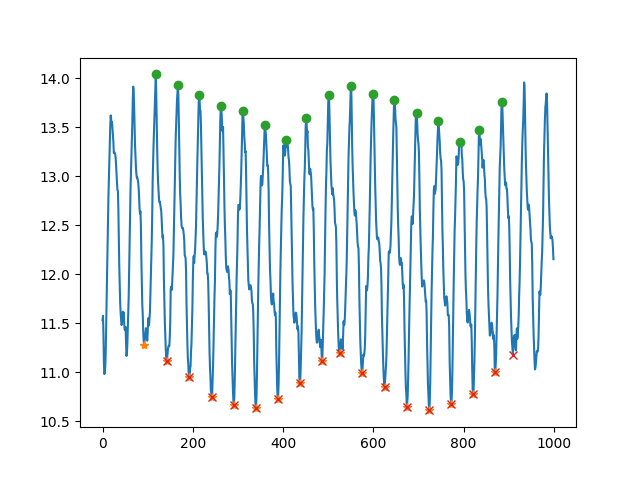

In [5]:
pixel_row = 8
pixel_col = 8
pixel_data = ssequence.eit_data["raw"].pixel_impedance

pixel_breaths = np.stack(breath_container.values)

start_indices = [
    np.argmax(ssequence.eit_data["raw"].time == start_time)
    for pixel_breath in pixel_breaths[:, pixel_row, pixel_col]
    if pixel_breath is not None
    for start_time in [pixel_breath.start_time]
]

middle_indices = [
    np.argmax(ssequence.eit_data["raw"].time == middle_time)
    for pixel_breath in pixel_breaths[:, pixel_row, pixel_col]
    if pixel_breath is not None
    for middle_time in [pixel_breath.middle_time]
]

end_indices = [
    np.argmax(ssequence.eit_data["raw"].time == end_time)
    for pixel_breath in pixel_breaths[:, pixel_row, pixel_col]
    if pixel_breath is not None
    for end_time in [pixel_breath.end_time]
]


plt.figure()
plt.plot(pixel_data[:, pixel_row, pixel_col])
plt.plot(start_indices, pixel_data[start_indices, pixel_row, pixel_col], "*")
plt.plot(middle_indices, pixel_data[middle_indices, pixel_row, pixel_col], "o")
plt.plot(end_indices, pixel_data[end_indices, pixel_row, pixel_col], "x")